# Homework 2
## Question 2
### Part A

In [1]:
from AdaBoost import AdaBoost
import pandas as pd


bank_train: pd.DataFrame = pd.read_csv(
      "/Users/divytripathy/PycharmProjects/Machine Learning/DecisionTreePackage/bank/train.csv",
      names=["age", "job", "marital", "education", "default", "balance", "housing",
             "loan", "contact", "day", "month", "duration", "campaign", "pdays",
             "previous", "poutcome", "y"])
print(bank_train.head())

   age          job  marital  education default  balance housing loan  \
0   41     services  married  secondary      no        0     yes   no   
1   48  blue-collar   single  secondary      no      312     yes  yes   
2   55   technician  married  secondary      no     1938      no  yes   
3   54       admin.  married   tertiary      no       59     yes   no   
4   34   management   single   tertiary      no     2646      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome    y  
0   unknown    5   may       114         2     -1         0  unknown   no  
1  cellular    3   feb       369         2     -1         0  unknown   no  
2  cellular   18   aug       193         1    386         3  success  yes  
3  cellular   10   jul       268         1     -1         0  unknown   no  
4  cellular   14   apr       142         1     -1         0  unknown  yes  


In [2]:
bank_test: pd.DataFrame = pd.read_csv(
      "/Users/divytripathy/PycharmProjects/Machine Learning/DecisionTreePackage/bank/test.csv",
      names=["age", "job", "marital", "education", "default", "balance", "housing",
             "loan", "contact", "day", "month", "duration", "campaign", "pdays",
             "previous", "poutcome", "y"])
print(bank_test.head())

   age           job  marital  education default  balance housing loan  \
0   41    management   single  secondary      no      764      no   no   
1   39   blue-collar  married  secondary      no       49     yes   no   
2   60       retired  married    primary      no        0      no   no   
3   31  entrepreneur   single   tertiary      no      247     yes  yes   
4   26       student   single    unknown      no     2020      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome   y  
0   cellular   12   jun       230         2     -1         0  unknown  no  
1   cellular   14   may       566         1    370         2  failure  no  
2  telephone   30   jul       130         3     -1         0  unknown  no  
3    unknown    2   jun       273         1     -1         0  unknown  no  
4  telephone   28   jan        42         3     -1         0  unknown  no  


Lets write a function that makes the numerical variables binary.

In [3]:
def make_numerical_attributes_binary(data):
      column_types: dict[str, str] = data.dtypes.to_dict()
      for column in column_types:
        if column_types[column] == "int64" or column_types[column] == "float64":
          data[column] = data[column].apply(lambda x: x >= data[column].median())

In [4]:
make_numerical_attributes_binary(bank_test)
make_numerical_attributes_binary(bank_train)

Let's also make a helper function that would calculate the training and the testing errors.

In [13]:
def predict_dataframe(model: AdaBoost, test_data: pd.DataFrame, label: str) -> float:
      accuracy_count: int = 0  # represents the count of correct predictions
      for j in range(test_data.shape[0]):
        if model.predict(test_data, j) == test_data[label].iloc[j]:
          accuracy_count += 1
      return accuracy_count / len(test_data)

Lets train our trees and visualize the errors.

In [6]:
accuracies_train = []
accuracies_test = []
num_trees = range(1, 500 + 1, 100)
for i in num_trees:
    tree: AdaBoost = AdaBoost(bank_train)
    tree.build(attributes=set(bank_train.columns) - {"y"}, label="y", splitting_criteria=tree.ENTROPY,
               num_trees=i)
    accuracies_train.append(predict_dataframe(tree, bank_train, "y"))
    accuracies_test.append(predict_dataframe(tree, bank_test, "y"))
    print("finished",  i)

finished 1
finished 101
finished 201
finished 301
finished 401


Lets visualize the accuracies.

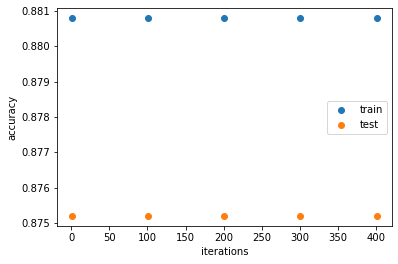

In [12]:
from matplotlib import pyplot as plt
import numpy as np

train = plt.scatter(list(num_trees), np.array(accuracies_train)/5000)
test = plt.scatter(list(num_trees), np.array(accuracies_test)/5000)
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend((train, test), ("train", 'test'))
plt.show()

### Part B

In [14]:
from BaggedTree import BaggedTree
def predict_dataframe(model: BaggedTree, test_data: pd.DataFrame, label: str) -> float:
      accuracy_count: int = 0  # represents the count of correct predictions
      for j in range(test_data.shape[0]):
        if model.predict(test_data, j) == test_data[label].iloc[j]:
          accuracy_count += 1
      return accuracy_count / len(test_data)

In [16]:
accuracies_train = []
accuracies_test = []
num_trees = range(1, 500 + 1, 100)
for i in num_trees:
    tree: BaggedTree = BaggedTree(bank_train)
    tree.build(attributes=set(bank_train.columns) - {"y"}, label="y", splitting_criteria=tree.ENTROPY,
               num_trees=i, num_samples=bank_train.shape[0])
    accuracies_train.append(predict_dataframe(tree, bank_train, "y"))
    accuracies_test.append(predict_dataframe(tree, bank_test, "y"))
    print("finished",  i)

finished 1
finished 101
finished 201
finished 301
finished 401


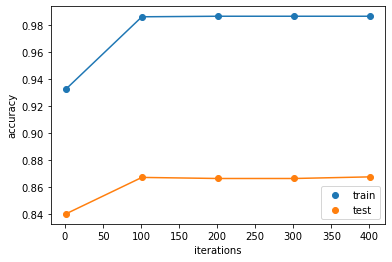

In [20]:
from matplotlib import pyplot as plt
import numpy as np

train = plt.scatter(list(num_trees), np.array(accuracies_train))
plt.plot(list(num_trees), np.array(accuracies_train))
test = plt.scatter(list(num_trees), np.array(accuracies_test))
plt.plot(list(num_trees), np.array(accuracies_test))
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend((train, test), ("train", 'test'))
plt.show()

### Part C

In [21]:
from RandomForest import RandomForest
def predict_dataframe(model: RandomForest, test_data: pd.DataFrame, label: str) -> float:
      accuracy_count: int = 0  # represents the count of correct predictions
      for j in range(test_data.shape[0]):
        if model.predict(test_data, j) == test_data[label].iloc[j]:
          accuracy_count += 1
      return accuracy_count / len(test_data)

In [22]:
accuracies_train = []
accuracies_test = []
num_trees = range(1, 500 + 2, 100)
for i in num_trees:
    tree: RandomForest = RandomForest(bank_train)
    tree.build(attributes=set(bank_train.columns) - {"y"}, label="y", splitting_criteria=tree.ENTROPY,
               num_trees=i, num_samples=bank_train.shape[0], num_attributes=2)
    accuracies_train.append(predict_dataframe(tree, bank_train, "y"))
    accuracies_test.append(predict_dataframe(tree, bank_test, "y"))
    print("finished",  i)

finished 1
finished 101
finished 201
finished 301
finished 401
finished 501


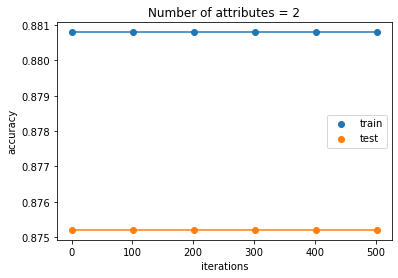

In [24]:
from matplotlib import pyplot as plt
import numpy as np

train = plt.scatter(list(num_trees), np.array(accuracies_train))
plt.plot(list(num_trees), np.array(accuracies_train))
test = plt.scatter(list(num_trees), np.array(accuracies_test))
plt.plot(list(num_trees), np.array(accuracies_test))
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Number of attributes = 2")
plt.legend((train, test), ("train", 'test'))
plt.show()

In [25]:
accuracies_train = []
accuracies_test = []
num_trees = range(1, 500 + 2, 100)
for i in num_trees:
    tree: RandomForest = RandomForest(bank_train)
    tree.build(attributes=set(bank_train.columns) - {"y"}, label="y", splitting_criteria=tree.ENTROPY,
               num_trees=i, num_samples=bank_train.shape[0], num_attributes=4)
    accuracies_train.append(predict_dataframe(tree, bank_train, "y"))
    accuracies_test.append(predict_dataframe(tree, bank_test, "y"))
    print("finished",  i)

finished 1
finished 101
finished 201
finished 301
finished 401
finished 501


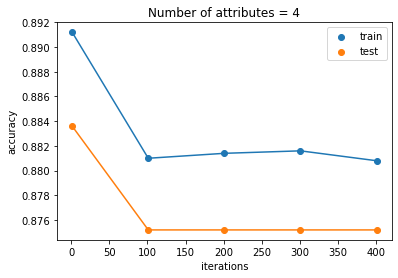

In [30]:
from matplotlib import pyplot as plt
import numpy as np

train = plt.scatter(list(num_trees), np.array(accuracies_train))
plt.plot(list(num_trees), np.array(accuracies_train))
test = plt.scatter(list(num_trees), np.array(accuracies_test))
plt.plot(list(num_trees), np.array(accuracies_test))
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Number of attributes = 4")
plt.legend((train, test), ("train", 'test'))
plt.show()

In [27]:
accuracies_train = []
accuracies_test = []
num_trees = range(1, 500 + 1, 100)
for i in num_trees:
    tree: RandomForest = RandomForest(bank_train)
    tree.build(attributes=set(bank_train.columns) - {"y"}, label="y", splitting_criteria=tree.ENTROPY,
               num_trees=i, num_samples=bank_train.shape[0], num_attributes=6)
    accuracies_train.append(predict_dataframe(tree, bank_train, "y"))
    accuracies_test.append(predict_dataframe(tree, bank_test, "y"))
    print("finished",  i)

finished 1
finished 101
finished 201
finished 301
finished 401


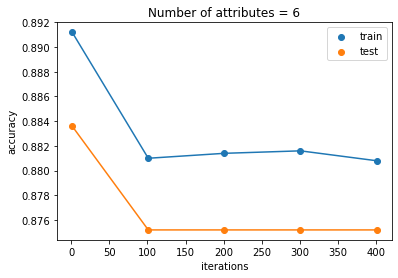

In [29]:
from matplotlib import pyplot as plt
import numpy as np

train = plt.scatter(list(num_trees), np.array(accuracies_train))
plt.plot(list(num_trees), np.array(accuracies_train))
test = plt.scatter(list(num_trees), np.array(accuracies_test))
plt.plot(list(num_trees), np.array(accuracies_test))
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Number of attributes = 6")
plt.legend((train, test), ("train", 'test'))
plt.show()